# Fehler der Modellgeraden 


Gesucht sei die Ausgleichsgerade $y=ax+b$ und deren Fehler $\sigma_y$ des linearen Regressionsproblems für $N>2$ Datenpunkte $(x_i, d_i)$.

Der Lösungsvektor ${\bf x}=[a,b]^T$ ergibt sich aus der Matrixformulierung des linearen Regressionsproblems

$$
a x_1 + b = d_1 \\
a x_2 + b = d_2 \\
..\\
a x_N + b = d_N\\
$$

$$\underbrace{{\bf A}}_{N\times2}\underbrace{{\bf x}}_{2\times1}=\underbrace{{\bf d}}_{N\times1}$$


Im Allgemeinen ist es unmöglich das Gleichungssystem ${\bf A\cdot x=d}$ exakt zu lösen. Wir suchen die Lösung im Sinne der kleinsten quadratischen Abweichung

$${\bf F}={\bf e}^T\cdot {\bf e}= ({\bf A\cdot x-d})^T({\bf A\cdot x-d}) $$.



als

$${\bf x}=({\bf A}^T {\bf A})^{-1}{\bf A}^T{\bf d}$$.


Die Kovarianzmatrix errechnet sich aus ${\rm cov}({\bf x})=[({\bf A}^T {\bf A})^{-1}{\bf A}^T] {\rm cov}({\bf d}) [({\bf A}^T {\bf A})^{-1}{\bf A}^T]^T$ für unkorrelierte Daten mit Fehler $\sigma_d^2$ und Kovarianz ${\rm cov}({\bf d})=\sigma_d {\bf 1}$ zu

$${\rm cov}({\bf x})=\sigma_d^2 ({\bf A}^T {\bf A})^{-1}$$.




Fassen wir $y$ als lineare Abbildung ${\bf G}=[x,1]$ von ${\bf u}=[a, b]^T$ auf

$$\underbrace{y}_{1\times 1}=\underbrace{\bf G}_{2 \times 1} \underbrace{\bf u}_{1 \times 2}$$

dann ist die Kovarianz gegeben durch

$$\rm cov(y)={\bf G}{\rm cov}({\bf u}){\bf G}^T$$.

Mit ${\rm cov}({\bf u})=\left( \begin{array}{cc} \sigma_a^2 & \sigma_{ab}^2\\ \sigma_{ab}^2 & \sigma_b^2 \end{array} \right)$ ergibt sich der gesuchte Fehler

$$\sigma_y^2=\sigma^2_a x^2 +2 \sigma_{ab} x+ \sigma_b^2$$

Der Fehler ist minimal im Schwerpunkt $x=\bar{x}$ der Daten. Für sehr große und sehr kleine $x$ ist der Fehler proportional zum Fehler der Steigung $\sigma_a$. 

## Python-Beispiel Lineare-Regression

Populating the interactive namespace from numpy and matplotlib
[ 0.40152768  0.2184287   0.44117141 -0.04235238 -0.16512194 -0.4892583
 -0.51473881]

Wahre vorgegebene Werte:
a=-1.00
b=0.50

Durch Regression von Y=a*X+b bestimmte Werte:
a=-1.02  +-0.18
b=0.49  +-0.11


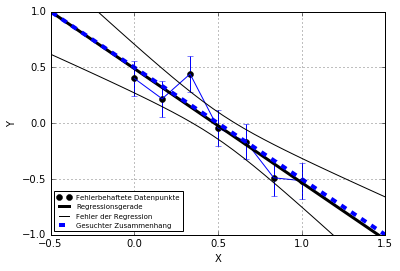

In [1]:
%pylab inline
# Erzeuge Zufallswerte
N=7
a_wahr=-1.0
b_wahr=0.5

s=0.4#  Messfehler 

t=linspace(0,1,N)
data=a_wahr*t+b_wahr+randn(N)*s**2
data=array([ 0.40152768,0.2184287,0.44117141,-0.04235238,-0.16512194,-0.4892583, -0.51473881])

print(data)
data_wahr=a_wahr*t+b_wahr

# Lineare Regression

A=array((t/s,ones(N)/s)).T
d=array(data/s).T

x=dot(dot(inv(dot(A.T,A)),A.T),d)  # Least-Squares Loesung

# Fehler der Loesung (Daten unkorreliert)
# Kovarianzmatrix
sigma_x = s**2 * inv(dot(A.T,A))
sigma_a2=sigma_x[0,0]
sigma_ab2=sigma_x[0,1]
sigma_b2=sigma_x[1,1]

a,b=float(x[0]),float(x[1])
X=linspace(-1,2)
Y=a*X+b

print('\nWahre vorgegebene Werte:')
print('a=%3.2f'%a_wahr)
print('b=%3.2f'%b_wahr)

print('\nDurch Regression von Y=a*X+b bestimmte Werte:')
print('a=%3.2f'%a,' +-%3.2f'%sqrt(sigma_a2))
print('b=%3.2f'%b,' +-%3.2f'%sqrt(sigma_b2))

# 1-sigma Konfidenzintervalle fuer Y
sigma_Y=sqrt(sigma_a2*X**2+2*sigma_ab2*X+sigma_b2)

figure(1)
plot(t,data,'ko',label='Fehlerbehaftete Datenpunkte')
errorbar(t,data,yerr=s**2)
plot(X,Y,'k-',label='Regressionsgerade',lw=3)
plot(X,Y-sigma_Y*2,'k-',label='Fehler der Regression')
plot(X,Y+sigma_Y*2,'k-')
plot(X,X*a_wahr+b_wahr,'b--',linewidth=4,label='Gesuchter Zusammenhang')
xlabel('X')
ylabel('Y') 
legend(loc=3,fontsize=7)
axis([-0.5,1.5,-1,1])
grid()

## Octave-Beispiel

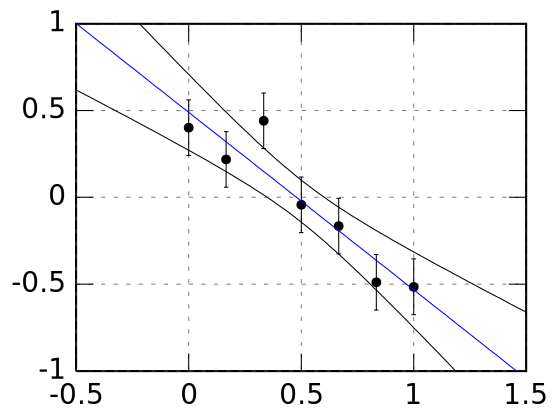

data =

   0.401528   0.218429   0.441171  -0.042352  -0.165122  -0.489258  -0.514739

Durch Regression von Y=a*X+b bestimmte Werte:
a=-1.02 +-0.18
b=0.49 +-0.11


In [15]:
% Erzeuge Zufallswerte
N=7;
a_wahr=-1.0;
b_wahr=0.5;
s=0.4;%  Messfehler 
t=linspace(0,1,N);
data=a_wahr.*t+b_wahr+randn(1,N)*s.^2;
% Gleiche Werte wie Python-Beispiel oben
data=[ 0.40152768  0.2184287   0.44117141 -0.04235238 -0.16512194 -0.4892583 -0.51473881]
data_wahr=a_wahr.*t+b_wahr;

A=[transpose(t)./s,ones(N,1)./s];
d=[transpose(data./s)];
x=inv(transpose(A)*A)*transpose(A)*d ;
sigma_x = s.^2 .* inv(transpose(A)*A);
sigma_a2=sigma_x(1,1);
sigma_ab2=sigma_x(1,2);
sigma_b2=sigma_x(2,2);
a=x(1);
b=x(2);

disp('Durch Regression von Y=a*X+b bestimmte Werte:')
disp(['a=',num2str(a,'%3.2f'),' +-',num2str(sqrt(sigma_a2),'%3.2f')])
disp(['b=',num2str(b,'%3.2f'),' +-',num2str(sqrt(sigma_b2),'%3.2f')])

X=linspace(-1,2);
Y=a*X+b;
sigma_Y=sqrt(sigma_a2.*X.^2+2.*sigma_ab2.*X+sigma_b2);

errorbar(t,data,s.^2,'k.');
hold;
plot(X,Y);
plot(X,Y-sigma_Y*2,'k-');
plot(X,Y+sigma_Y*2,'k-');
axis([-0.5,1.5,-1,1]);
grid();

In [12]:
sigma_x

sigma_x =

   0.032914  -0.016457
  -0.016457   0.011886



## Octave Regress-Funktion

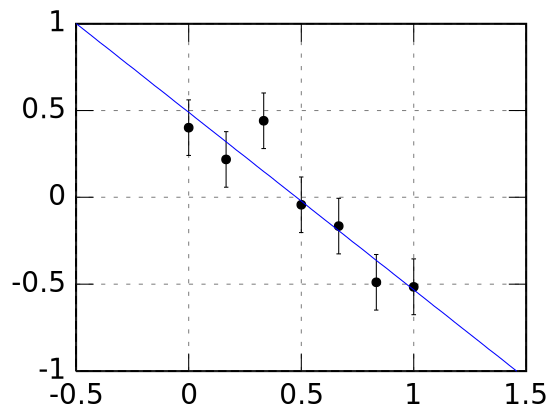

data =

   0.401528   0.218429   0.441171  -0.042352  -0.165122  -0.489258  -0.514739

Durch Regression von Y=a*X+b bestimmte Werte:
a=-1.02 +-0.20
b=0.49 +-0.12
R^2=0.87
p=0.00215


In [17]:
% Erzeuge Zufallswerte
N=7;
a_wahr=-1.0;
b_wahr=0.5;
s=0.4;%  Messfehler 
t=linspace(0,1,N);
data=a_wahr.*t+b_wahr+randn(1,N)*s.^2;
data=[ 0.40152768  0.2184287   0.44117141 -0.04235238 -0.16512194 -0.4892583 -0.51473881]

data_wahr=a_wahr.*t+b_wahr;

X=[ones(N,1),transpose(t)];
Y=transpose(data);
ALPHA=0.31; % 1 sigma Konfidenz, Default ist 0.05= 2 Sigma
[B, BINT, R, RINT, STATS] = regress (Y, X, ALPHA);
a=B(2);
b=B(1);
x=linspace(-1,2);
y=a*x+b;

sigma_a=B(2)-BINT(2,1);
sigma_b=B(1)-BINT(1,1);

disp('Durch Regression von Y=a*X+b bestimmte Werte:')
disp(['a=',num2str(a,'%3.2f'),' +-',num2str(sigma_a,'%3.2f')])
disp(['b=',num2str(b,'%3.2f'),' +-',num2str(sigma_b,'%3.2f')])

R2=STATS(1);
disp(['R^2=',num2str(R2,'%3.2f')])

p=STATS(3);
disp(['p=',num2str(p,'%3.5f')])

errorbar(t,data,s.^2,'k.');
hold();
plot(x,y);

axis([-0.5,1.5,-1,1]);
grid();

In [6]:
regress?

In [14]:
corrcoef(t,data)**2

ans =  0.87045
